<a href="https://colab.research.google.com/github/Jayakrishna155/MachineLearning/blob/main/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
data = pd.read_csv("drive/MyDrive/Datasets/income.csv")
data.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income')

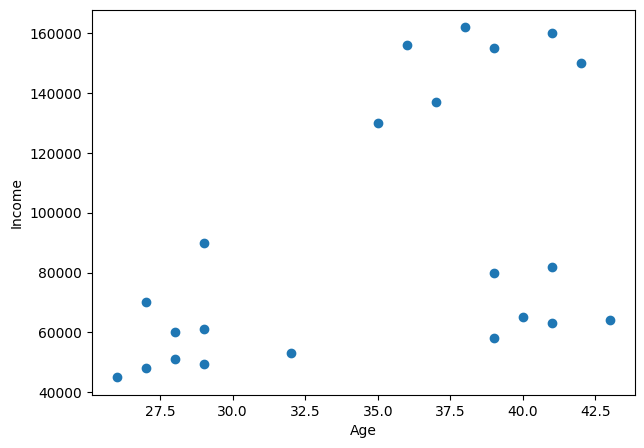

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
plt.scatter(data.Age,data["Income($)"])
plt.xlabel("Age")
plt.ylabel("Income")


In [4]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(data[["Age","Income($)"]])
data['cluster'] = y_predicted

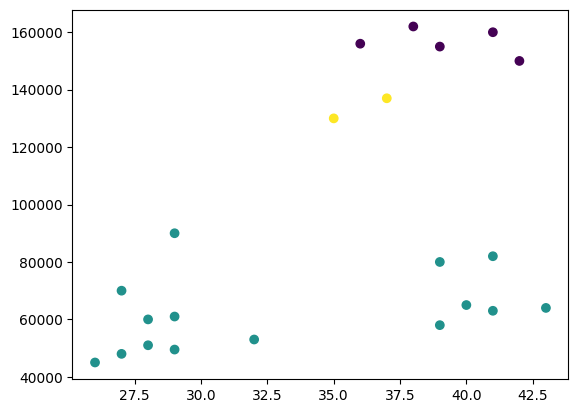

In [5]:
plt.scatter(data.Age,data["Income($)"],c=y_predicted)

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data[["Income($)"]])
data["Income($)"] = scaler.transform(data[["Income($)"]])
scaler.fit(data[["Age"]])
data["Age"] = scaler.transform(data[["Age"]])
data.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [7]:
km = KMeans(n_clusters = 3)
km.fit_predict(data[["Age","Income($)"]])
data["cluster"] = km.labels_
data.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


In [22]:
# plt.scatter(data.Age,data["Income($)"],c=data.cluster)
data = data.drop("cluster",axis=1)
sse =[]

In [23]:
for i in range (1,11):
  km = KMeans(n_clusters=i)
  km.fit(data[['Age','Income($)']])
  sse.append(km.inertia_)

In [24]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.38815291664787444,
 0.2664030124668416,
 0.2712041177596833,
 0.18311629202780538,
 0.1397684499538816,
 0.12504653758905085,
 0.08765995150300003]

Text(0, 0.5, 'SSE')

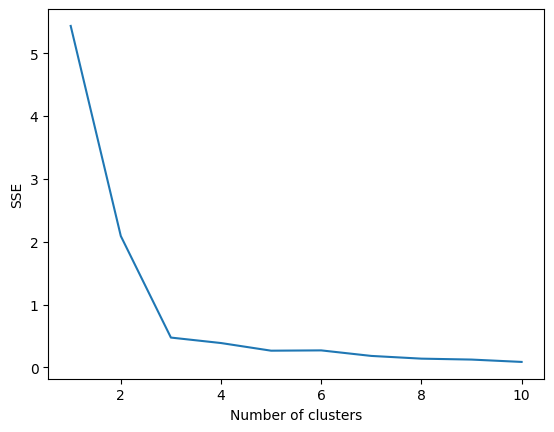

In [26]:
plt.plot(range(1,11),sse)
plt.xlabel("Number of clusters")
plt.ylabel("SSE")